In [142]:
%load_ext autoreload
%autoreload 2
    
from api.RequestOpenFood import QuerryError
from api.RequestOpenFood import RequestOpenFood
from api.RequestOpenFood import ProductBuilder

import api.Chart
import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


20230


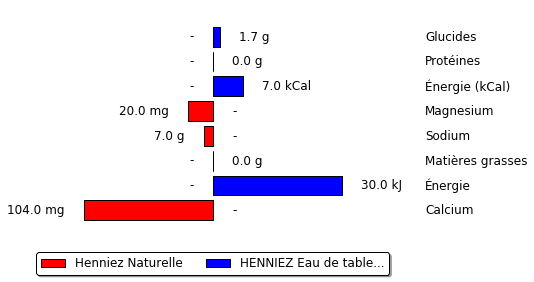

In [171]:
name_search = ['chocolat', 'noix']
ingerdient_search = ['lait', 'miel']
barcode_search = '7610848493136'
avoid_ingredient = 'noisette'


# 7610235000329 - henniez bleu
# 7610235000558 - henniez vert
# 7613033774188 - henniez special


    
try:
    #print('--- Name search:', name_search)
    #res = RequestOpenFood.search_name(id_from=0, id_size=5, name=name_search)
    #res = ProductBuilder.clean_data(res)
    
    #print('--- Barcode search', barcode_search)
    #res = RequestOpenFood.get_product(barcode=barcode_search)
    #res = ProductBuilder.clean_data(res)
    
    
    res = RequestOpenFood.get_product(barcode='7610235000329')
    res = ProductBuilder.clean_data(res)
    res2 = RequestOpenFood.get_product(barcode='7613033774188')
    res2 = ProductBuilder.clean_data(res2)
    data = RequestOpenFood.compare_data(res[0], res2[0])
    print(len(data))
    
except QuerryError as err:
    print('Error', err.id_error, err.message)
    

In [113]:
print(data)
res = RequestOpenFood.get_nutrient(data)
print(res)

{'Énergie': ['30.0', '-'], 'Matières grasses': ['0.0', '-'], 'Calcium': ['-', '104.0'], 'Sodium': ['-', '7.0'], 'Magnesium': ['-', '20.0'], 'Énergie (kCal)': ['7.0', '-'], 'Protéines': ['0.0', '-'], 'Glucides': ['1.7', '-']}
['kJ', 'g', 'mg', 'g', 'mg', 'kCal', 'g', 'g']


AttributeError: 'BarContainer' object has no attribute 'set_xlabel'

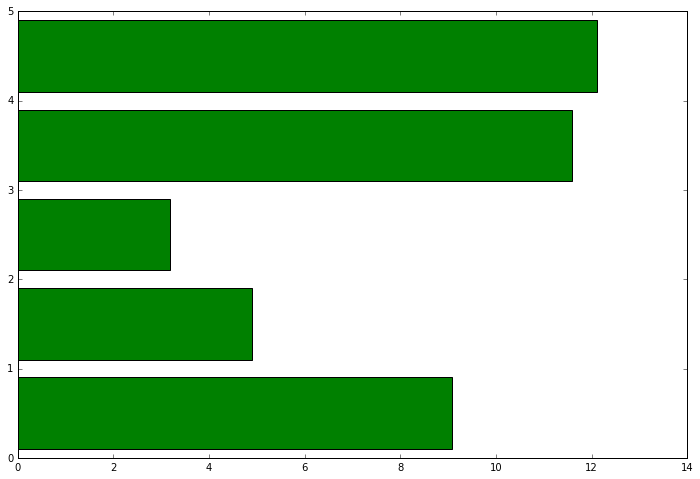

In [443]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import io
from pylab import *

import numpy as np
import pandas as pd

frequencies = [6, 16, 75, 160, 244, 260, 145, 73, 16, 4, 1]   # bring some raw data

freq_series = pd.Series.from_array(frequencies)   # in my original code I create a series and run on that, so for consistency I create a series from the list.

x_labels = [108300.0, 110540.0, 112780.0, 115020.0, 117260.0, 119500.0, 121740.0, 123980.0, 126220.0, 128460.0, 130700.0]

# now to plot the figure...
plt.figure(figsize=(12, 8))
ax = barh(pos,val, align='center', color='green')
ax.set_xlabel("Amount ($)")
ax.set_ylabel("Frequency")
ax.set_xticklabels(x_labels)

rects = ax.patches

# Now make some labels
labels = ["label%d" % i for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

